# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
wUrl = f"http://api.openweathermap.org/data/2.5/weather?q=plano&appid={weather_api_key}"

requests.get(wUrl).json()

{'coord': {'lon': -96.7, 'lat': 33.02},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 292.29,
  'feels_like': 294.6,
  'temp_min': 291.48,
  'temp_max': 293.15,
  'pressure': 1020,
  'humidity': 95},
 'visibility': 10000,
 'wind': {'speed': 0.89, 'deg': 72, 'gust': 4.47},
 'clouds': {'all': 100},
 'dt': 1600823060,
 'sys': {'type': 3,
  'id': 2009819,
  'country': 'US',
  'sunrise': 1600776917,
  'sunset': 1600820603},
 'timezone': -18000,
 'id': 4719457,
 'name': 'Plano',
 'cod': 200}

In [4]:
cdf = pd.DataFrame(columns = ["City","Country", "date", "Lat","Lon","MaxTemp","WindSpeed","Clouds","Humidity"])
#exception handling


In [14]:
 cntr = 1
 for city in cities:
    wUrl = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    print(f"Processing Record {cntr} of {len(cities)} : {city}")
    
    cntr += 1
    
    try:
        cdata = requests.get(wUrl).json()
        print(f"Current Temperature is : {cdata['main']['temp']} F")
        tmp = pd.DataFrame({
            "City":city,
            "Country":cdata['sys']['country'],
           "date":cdata['dt'],
            "Lat":cdata['coord']['lat'],
            "Lon":cdata['coord']['lon'],
            "MaxTemp":cdata['main']['temp_max'],
            "WindSpeed":cdata['wind']['speed'],
            "Clouds":cdata['clouds']['all'],
            "Humidity":cdata['main']['humidity']
        }, index = [0])

        cdf = pd.concat([cdf, tmp], ignore_index = True, sort=False)
    except:
        print(f"{city} not found, skipping it....")
    
    
    

Processing Record 1 of 629 : touros
Current Temperature is : 75.2 F
Processing Record 2 of 629 : kaitangata
Current Temperature is : 58.12 F
Processing Record 3 of 629 : dolbeau
dolbeau not found, skipping it....
Processing Record 4 of 629 : butaritari
Current Temperature is : 82.63 F
Processing Record 5 of 629 : batticaloa
Current Temperature is : 81.25 F
Processing Record 6 of 629 : tasiilaq
Current Temperature is : 28.4 F
Processing Record 7 of 629 : taolanaro
taolanaro not found, skipping it....
Processing Record 8 of 629 : ahipara
Current Temperature is : 63.63 F
Processing Record 9 of 629 : jamestown
Current Temperature is : 53.2 F
Processing Record 10 of 629 : yellowknife
Current Temperature is : 53.22 F
Processing Record 11 of 629 : punta arenas
Current Temperature is : 42.39 F
Processing Record 12 of 629 : nanortalik
Current Temperature is : 37.26 F
Processing Record 13 of 629 : dasoguz
Current Temperature is : 46.4 F
Processing Record 14 of 629 : sumbawa
sumbawa not found, sk

tarudant not found, skipping it....
Processing Record 116 of 629 : axim
Current Temperature is : 75.06 F
Processing Record 117 of 629 : copiapo
Current Temperature is : 55.4 F
Processing Record 118 of 629 : sinazongwe
Current Temperature is : 72.86 F
Processing Record 119 of 629 : byron bay
Current Temperature is : 77.56 F
Processing Record 120 of 629 : mansa
Current Temperature is : 78.55 F
Processing Record 121 of 629 : male
Current Temperature is : 80.6 F
Processing Record 122 of 629 : russell
Current Temperature is : 68.5 F
Processing Record 123 of 629 : oeiras
Current Temperature is : 83.41 F
Processing Record 124 of 629 : biak
Current Temperature is : 81.93 F
Processing Record 125 of 629 : grand gaube
Current Temperature is : 66.99 F
Processing Record 126 of 629 : salalah
Current Temperature is : 80.6 F
Processing Record 127 of 629 : sur
Current Temperature is : 81.97 F
Processing Record 128 of 629 : dalby
Current Temperature is : 77 F
Processing Record 129 of 629 : kudahuvadhoo


Current Temperature is : 12.85 F
Processing Record 229 of 629 : lufilufi
Current Temperature is : 80.29 F
Processing Record 230 of 629 : lascahobas
Current Temperature is : 86 F
Processing Record 231 of 629 : rawson
Current Temperature is : 52.77 F
Processing Record 232 of 629 : deputatskiy
Current Temperature is : 42.71 F
Processing Record 233 of 629 : sao raimundo nonato
Current Temperature is : 78.37 F
Processing Record 234 of 629 : calama
Current Temperature is : 64.4 F
Processing Record 235 of 629 : meulaboh
Current Temperature is : 78.93 F
Processing Record 236 of 629 : mys shmidta
mys shmidta not found, skipping it....
Processing Record 237 of 629 : prestea
Current Temperature is : 71.42 F
Processing Record 238 of 629 : kropotkin
Current Temperature is : 58.1 F
Processing Record 239 of 629 : umm kaddadah
Current Temperature is : 84.31 F
Processing Record 240 of 629 : achisay
achisay not found, skipping it....
Processing Record 241 of 629 : clyde river
Current Temperature is : 24

Current Temperature is : 75.51 F
Processing Record 342 of 629 : nantucket
Current Temperature is : 62.6 F
Processing Record 343 of 629 : ajaccio
Current Temperature is : 62.6 F
Processing Record 344 of 629 : chiang khong
Current Temperature is : 77 F
Processing Record 345 of 629 : muros
Current Temperature is : 64 F
Processing Record 346 of 629 : oxford
Current Temperature is : 59 F
Processing Record 347 of 629 : yatou
Current Temperature is : 69.22 F
Processing Record 348 of 629 : bathsheba
Current Temperature is : 82.4 F
Processing Record 349 of 629 : rauma
Current Temperature is : 50 F
Processing Record 350 of 629 : shikarpur
Current Temperature is : 80.6 F
Processing Record 351 of 629 : salamiyah
Current Temperature is : 64.72 F
Processing Record 352 of 629 : hunza
hunza not found, skipping it....
Processing Record 353 of 629 : rock sound
Current Temperature is : 81.23 F
Processing Record 354 of 629 : awjilah
Current Temperature is : 70.79 F
Processing Record 355 of 629 : coahuayan

Current Temperature is : 35.6 F
Processing Record 454 of 629 : birao
Current Temperature is : 72.61 F
Processing Record 455 of 629 : bolungarvik
bolungarvik not found, skipping it....
Processing Record 456 of 629 : calvinia
Current Temperature is : 55.6 F
Processing Record 457 of 629 : igrim
Current Temperature is : 40.33 F
Processing Record 458 of 629 : imeni poliny osipenko
Current Temperature is : 56.28 F
Processing Record 459 of 629 : san patricio
Current Temperature is : 82.4 F
Processing Record 460 of 629 : jinxiang
Current Temperature is : 81.45 F
Processing Record 461 of 629 : faro
Current Temperature is : 68 F
Processing Record 462 of 629 : oktyabrskoye
Current Temperature is : 46.4 F
Processing Record 463 of 629 : augustow
Current Temperature is : 54.7 F
Processing Record 464 of 629 : port keats
Current Temperature is : 92.1 F
Processing Record 465 of 629 : hovd
Current Temperature is : 54.28 F
Processing Record 466 of 629 : kuruman
Current Temperature is : 55.99 F
Processing

Current Temperature is : 60.3 F
Processing Record 567 of 629 : ulladulla
Current Temperature is : 63.9 F
Processing Record 568 of 629 : springville
Current Temperature is : 75.56 F
Processing Record 569 of 629 : dindori
Current Temperature is : 71.83 F
Processing Record 570 of 629 : rio gallegos
Current Temperature is : 44.6 F
Processing Record 571 of 629 : flinders
Current Temperature is : 70 F
Processing Record 572 of 629 : mareeba
Current Temperature is : 82.35 F
Processing Record 573 of 629 : oranjemund
Current Temperature is : 64.06 F
Processing Record 574 of 629 : rio grande
Current Temperature is : 53.73 F
Processing Record 575 of 629 : ardistan
ardistan not found, skipping it....
Processing Record 576 of 629 : fort morgan
Current Temperature is : 77 F
Processing Record 577 of 629 : kristiinankaupunki
Current Temperature is : 52.72 F
Processing Record 578 of 629 : kontagora
Current Temperature is : 73.06 F
Processing Record 579 of 629 : north platte
Current Temperature is : 80.6

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
cdf.to_csv("cities.csv", index = False)
cdf

,City,Country,date,Lat,Lon,MaxTemp,WindSpeed,Clouds,Humidity
0,touros,BR,1600823060,-5.20,-35.46,75.20,5.82,20,83
1,kaitangata,NZ,1600823060,-46.28,169.85,58.12,5.66,8,73
2,butaritari,KI,1600823061,3.07,172.79,82.63,17.45,6,75
3,batticaloa,LK,1600823062,7.71,81.69,81.25,1.92,98,69
4,tasiilaq,GL,1600823062,65.61,-37.64,28.40,6.93,100,74
...,...,...,...,...,...,...,...,...,...
578,clonakilty,IE,1600823321,51.62,-8.87,52.00,8.05,20,93
579,wajima,JP,1600823322,37.40,136.90,73.40,9.17,20,73
580,port blair,IN,1600823322,11.67,92.75,82.94,5.95,100,79
581,martapura,ID,1600823322,-3.42,114.85,78.80,3.36,20,94


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
hum = cdf.loc[cdf["Humidity"] > 90]
hum

,City,Country,date,Lat,Lon,MaxTemp,WindSpeed,Clouds,Humidity
14,bredasdorp,ZA,1600823067,-34.53,20.04,42.80,2.24,0,93
20,malkangiri,IN,1600823069,18.35,81.90,76.53,2.30,57,91
22,serta,PT,1600823070,39.81,-8.10,68.00,2.71,100,93
24,hermanus,ZA,1600823070,-34.42,19.23,52.00,6.76,55,93
29,pevek,RU,1600823072,69.70,170.31,39.43,18.92,100,92
...,...,...,...,...,...,...,...,...,...
1141,corner brook,CA,1600823108,48.97,-57.95,50.00,5.82,90,93
1145,milton,US,1600823314,34.13,-84.30,60.01,1.63,82,92
1157,talnakh,RU,1600823319,69.49,88.40,46.40,15.66,75,93
1161,clonakilty,IE,1600823321,51.62,-8.87,52.00,8.05,20,93


In [22]:
#  Get the indices of cities that have humidity over 100%.
hum.index

Int64Index([  14,   20,   22,   24,   29,   33,   89,   91,  100,  128,
            ...
            1122, 1130, 1135, 1137, 1140, 1141, 1145, 1157, 1161, 1164],
           dtype='int64', length=178)

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.


# none of the citys have humidity over 100

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


# none of the citys have humidity over 100


In [24]:
# Extract relevant fields from the data frame




# Export the City_Data into a csv
cdf.to_csv("cities.csv", index = False)
cdf






,City,Country,date,Lat,Lon,MaxTemp,WindSpeed,Clouds,Humidity
0,touros,BR,1600823060,-5.20,-35.46,75.20,5.82,20,83
1,kaitangata,NZ,1600823060,-46.28,169.85,58.12,5.66,8,73
2,butaritari,KI,1600823061,3.07,172.79,82.63,17.45,6,75
3,batticaloa,LK,1600823062,7.71,81.69,81.25,1.92,98,69
4,tasiilaq,GL,1600823062,65.61,-37.64,28.40,6.93,100,74
...,...,...,...,...,...,...,...,...,...
1161,clonakilty,IE,1600823321,51.62,-8.87,52.00,8.05,20,93
1162,wajima,JP,1600823322,37.40,136.90,73.40,9.17,20,73
1163,port blair,IN,1600823322,11.67,92.75,82.94,5.95,100,79
1164,martapura,ID,1600823322,-3.42,114.85,78.80,3.36,20,94


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

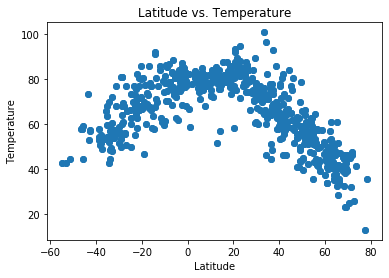

In [35]:
plt.scatter(x = cdf["Lat"] , y= cdf["MaxTemp"])
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("figure.png")
plt.show()



## Latitude vs. Humidity Plot

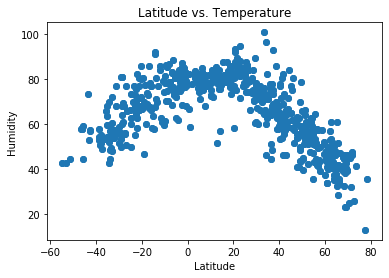

In [64]:
plt.scatter(x = cdf["Lat"] , y= cdf["Humidity"])
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("figure4.png")
plt.show()

## Latitude vs. Cloudiness Plot

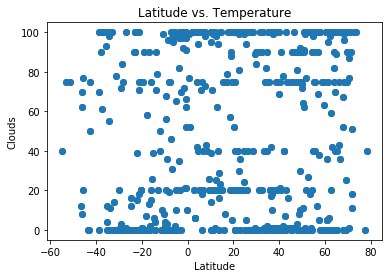

In [65]:
plt.scatter(x = cdf["Lat"] , y= cdf["Clouds"])
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.savefig("figure3.png")
plt.show()

## Latitude vs. Wind Speed Plot

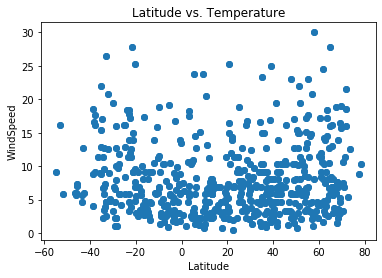

In [66]:
plt.scatter(x = cdf["Lat"] , y= cdf["WindSpeed"])
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")
plt.savefig("figure2.png")
plt.show()

## Linear Regression

The r vaule is -0.41118612053111964


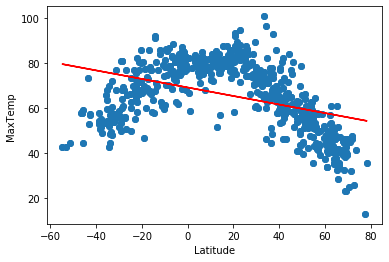

In [42]:
# OPTIONAL: Create a function to create Linear Regression plotslinregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x = cdf["Lat"], y = cdf["MaxTemp"])
regress_values = cdf["Lat"] * slope + intercept

plt.scatter(x = cdf["Lat"] , y= cdf["MaxTemp"])

plt.plot(cdf["Lat"], regress_values, color = "red")
plt.xlabel("Latitude")
plt.ylabel("MaxTemp ")
plt.savefig("figure5.png")
print(f"The r vaule is {rvalue}")
plt.show()


In [44]:
# Create Northern and Southern Hemisphere DataFrames

NorthernHem = cdf.loc[cdf["Lat"] > 0]
SouthernHem = cdf.loc[cdf["Lat"] < 0]


The r vaule is -0.8374470129083071


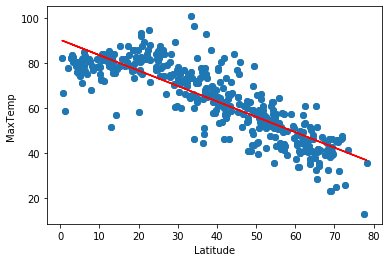

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x = NorthernHem["Lat"], y = NorthernHem["MaxTemp"])
regress_values = NorthernHem["Lat"] * slope + intercept

plt.scatter(x = NorthernHem["Lat"] , y= NorthernHem["MaxTemp"])

plt.plot(NorthernHem["Lat"], regress_values, color = "red")
plt.xlabel("Latitude")
plt.ylabel("MaxTemp ")
plt.savefig("figure6.png")
print(f"The r vaule is {rvalue}")
plt.show()

The r vaule is 0.7240363765189687


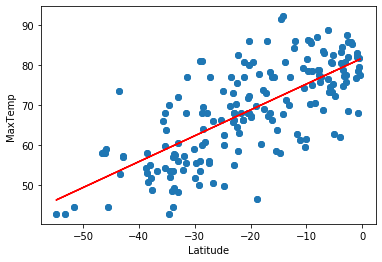

In [46]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x = SouthernHem["Lat"], y = SouthernHem["MaxTemp"])
regress_values = SouthernHem["Lat"] * slope + intercept

plt.scatter(x = SouthernHem["Lat"] , y= SouthernHem["MaxTemp"])

plt.plot(SouthernHem["Lat"], regress_values, color = "red")
plt.xlabel("Latitude")
plt.ylabel("MaxTemp ")
plt.savefig("figure7.png")
print(f"The r vaule is {rvalue}")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [51]:
SouthernHem.head()

,City,Country,date,Lat,Lon,MaxTemp,WindSpeed,Clouds,Humidity
0,touros,BR,1600823060,-5.20,-35.46,75.20,5.82,20,83
1,kaitangata,NZ,1600823060,-46.28,169.85,58.12,5.66,8,73
5,ahipara,NZ,1600823063,-35.17,173.17,63.63,12.82,12,70
8,punta arenas,CL,1600823064,-53.15,-70.92,42.80,16.11,75,75
11,vao,NC,1600823066,-22.67,167.48,70.23,12.03,0,79


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r vaule is 0.13190585915527148


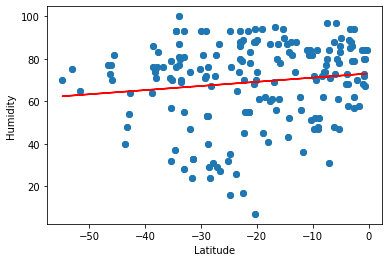

In [52]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x = NorthernHem["Lat"], y = NorthernHem["Humidity"].astype(float))
regress_values = NorthernHem["Lat"] * slope + intercept

plt.scatter(x = NorthernHem["Lat"] , y= NorthernHem["Humidity"])

plt.plot(NorthernHem["Lat"], regress_values, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity ")
plt.savefig("figure8.png")
print(f"The r vaule is {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r vaule is 0.7240363765189687


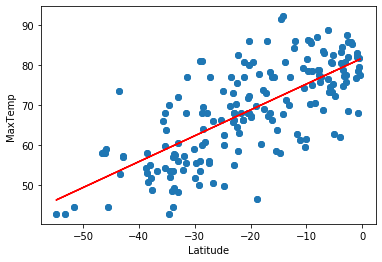

In [53]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x = SouthernHem["Lat"], y = SouthernHem["MaxTemp"].astype(float))
regress_values = SouthernHem["Lat"] * slope + intercept

plt.scatter(x = SouthernHem["Lat"] , y= SouthernHem["MaxTemp"])

plt.plot(SouthernHem["Lat"], regress_values, color = "red")
plt.xlabel("Latitude")
plt.ylabel("MaxTemp ")
plt.savefig("figure9.png")
print(f"The r vaule is {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r vaule is 0.143575953438202


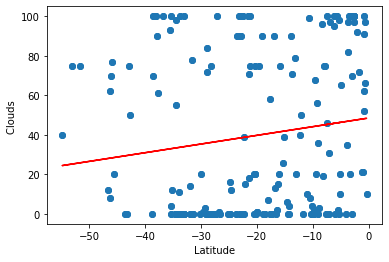

In [54]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x = NorthernHem["Lat"], y = NorthernHem["Clouds"].astype(float))
regress_values = NorthernHem["Lat"] * slope + intercept

plt.scatter(x = NorthernHem["Lat"] , y= NorthernHem["Clouds"])

plt.plot(NorthernHem["Lat"], regress_values, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Clouds ")
plt.savefig("figure10.png")
print(f"The r vaule is {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r vaule is 0.143575953438202


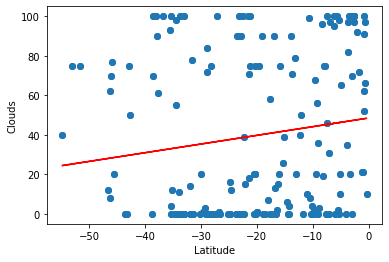

In [59]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x = SouthernHem["Lat"], y = SouthernHem["Clouds"].astype(float))
regress_values = SouthernHem["Lat"] * slope + intercept

plt.scatter(x = SouthernHem["Lat"] , y= SouthernHem["Clouds"])

plt.plot(SouthernHem["Lat"], regress_values, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.savefig("figure11.png")
print(f"The r vaule is {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r vaule is 0.1861732469074095


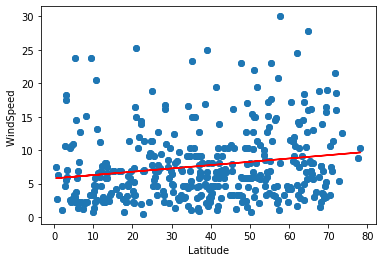

In [62]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x = NorthernHem["Lat"], y = NorthernHem["WindSpeed"].astype(float))
regress_values = NorthernHem["Lat"] * slope + intercept

plt.scatter(x = NorthernHem["Lat"] , y= NorthernHem["WindSpeed"])

plt.plot(NorthernHem["Lat"], regress_values, color = "red")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed ")
plt.savefig("figure12.png")
print(f"The r vaule is {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r vaule is -0.22955728189246555


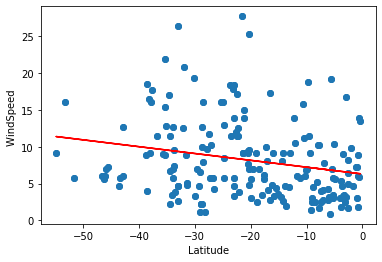

In [63]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x = SouthernHem["Lat"], y = SouthernHem["WindSpeed"].astype(float))
regress_values = SouthernHem["Lat"] * slope + intercept

plt.scatter(x = SouthernHem["Lat"] , y= SouthernHem["WindSpeed"])

plt.plot(SouthernHem["Lat"], regress_values, color = "red")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed ")
plt.savefig("figure13.png")
print(f"The r vaule is {rvalue}")
plt.show()